In [1]:
# Importing the libraries:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Importing IMDB Movie_data (Movie_Metadata)

In [2]:
# data source from kaggle:      "https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset"
data=pd.read_csv("D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\movie_metadata.csv")

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

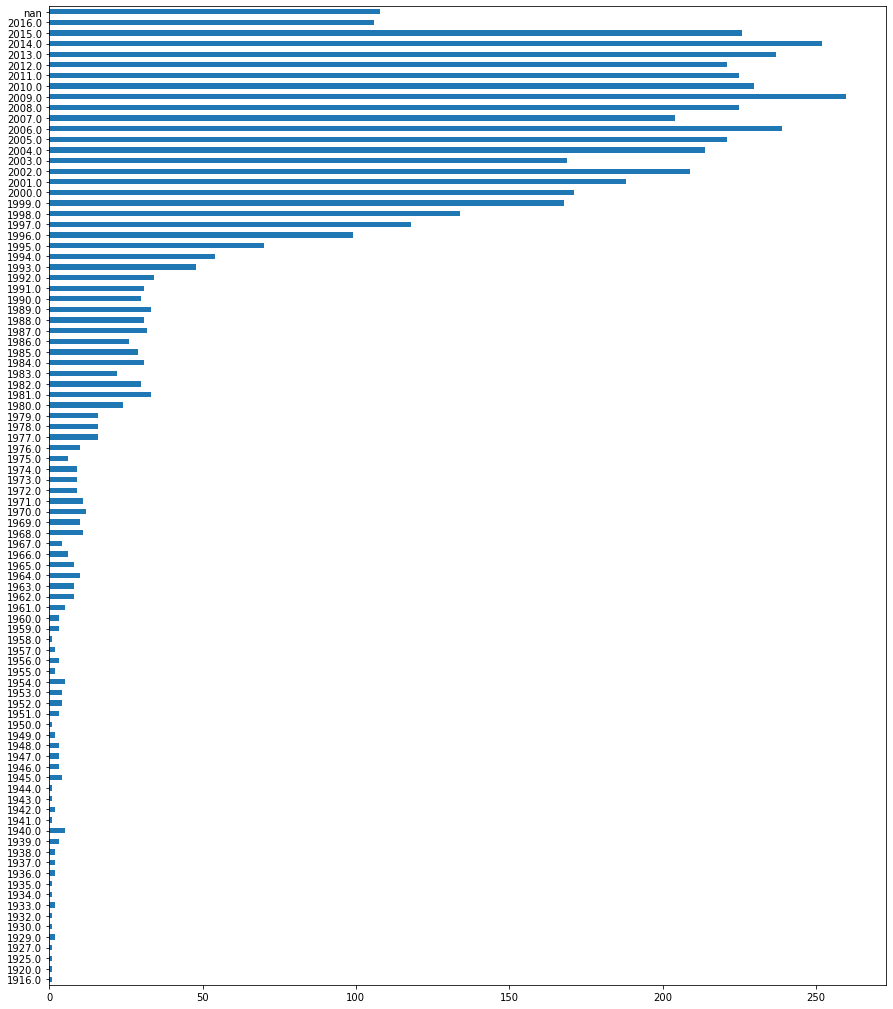

In [6]:
# lets see how many movies got released in each year: as per graph-dataset is present only till 2016:
x=data.title_year.value_counts(dropna=False).sort_index()
x.plot(kind='barh', figsize=(15,18))
plt.show()

In [7]:
data.movie_title

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [8]:
# lets see Number of movies "Avatar"
(data.movie_title=='Avatar\xa0').sum()      # 'xa0' present at the end of every movie title, will remove this later:

1

In [9]:
# Number of movies in entire dataset:
data.movie_title.value_counts()

Pan                            3
The Fast and the Furious       3
Ben-Hur                        3
Home                           3
Victor Frankenstein            3
                              ..
Glee: The 3D Concert Movie     1
The Warrior's Way              1
Hollow Man                     1
Motherhood                     1
Talk Radio                     1
Name: movie_title, Length: 4917, dtype: int64

In [10]:
# lets collect the most important features from this data as per our requirements:
data=data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [11]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
# lets handle the missing values:
data.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [13]:
# Replace entire values by "unknown" using Numpy library:
data['director_name']=data.director_name.replace(to_replace=np.nan, value='unknown')
data['actor_1_name']=data.actor_1_name.replace(to_replace=np.nan, value='unknown')
data['actor_2_name']=data.actor_2_name.replace(to_replace=np.nan, value='unknown')
data['actor_3_name']=data.actor_3_name.replace(to_replace=np.nan, value='unknown')

In [14]:
# lets replace a symble '|' by space ' ' from genres column:
data['genres']=data.genres.str.replace('|', ' ')

In [15]:
# lower the movie_title in order to remove case sensetive mismatch:
data['movie_title']=data.movie_title.str.lower()

In [16]:
data.movie_title[1]

"pirates of the caribbean: at world's end\xa0"

In [17]:
# lets remove symble 'xa0' from the end of movie title:
data['movie_title']=data.movie_title.apply(lambda y: y[:-1])

In [18]:
data.movie_title[1]

"pirates of the caribbean: at world's end"

In [19]:
data.head()           # movies present only till 2016

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...


In [20]:
# lets create a new column 'Combinations' with entire information 
data['Combinations']=data['actor_1_name']+', '+data['actor_2_name']+', '+data['actor_3_name']+', '+data['director_name']+', '+data['genres']

In [21]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,"CCH Pounder, Joel David Moore, Wes Studi, Jame..."
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,"Johnny Depp, Orlando Bloom, Jack Davenport, Go..."
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,"Christoph Waltz, Rory Kinnear, Stephanie Sigma..."
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,"Tom Hardy, Christian Bale, Joseph Gordon-Levit..."
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,"Doug Walker, Rob Walker, unknown, Doug Walker,..."


In [22]:
data.to_csv('D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\MY_Prectice\\data.csv', index=False)

In [23]:
# csv file saved at this location:
import os
os.getcwd()

'C:\\Users\\Dell\\Project\\Movie_Recommendation'

# importing Credits and Movies_metadata now:

In [24]:
# data source from kaggle:    "https://www.kaggle.com/rounakbanik/the-movies-dataset"
credits=pd.read_csv("D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\credits.csv")
meta=pd.read_csv("D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\movies_metadata.csv")

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [26]:
print(credits.columns,credits.shape)

Index(['cast', 'crew', 'id'], dtype='object') (45476, 3)


In [27]:
meta.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [28]:
print(meta.columns, meta.shape)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object') (45466, 24)


# From both these datasets we need to collect same features as first data.csv file we previosly created: so lets take meta dataset first:

In [29]:
# we need take above data than year 2016:
meta['release_date']=pd.to_datetime(meta['release_date'], errors='coerce')
# errors='coerce' to convert unparsable data to NaT (not a time), errors='raise/ignore/coerce':

In [30]:
#adding new column 'year' as we need above 2016 movies
meta['year']=meta['release_date'].dt.year

In [31]:
meta['year'].value_counts().sort_index()     # only few movies for 2018 and 2020 so we need to get this data from website.

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [32]:
# Now lets take only 2017 released moveies data from here. 
new_meta=meta.loc[meta.year==2017,['genres','id','title','year']]

In [33]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [34]:
new_meta['id']=new_meta['id'].astype(int)

In [35]:
# lets merge the new_meta with credits data on the basis of 'id':
data_1=pd.merge(new_meta,credits, on='id')

In [36]:
pd.set_option('display.max_colwidth',95)   # it increase the width of columns
data_1.head(3)

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 7..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a264fe10065f5...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': 0, 'id': 2..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a261fb3004e81', 'gend...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'gender': 2, 'id': 1056..."


In [37]:
data_1['genres'].dtype            #its object or string in dict form, its a list of dict elements, dict in key and pair forms:

dtype('O')

In [38]:
# lets import the ast library and convert string into list:
import ast
data_1['genres']=data_1['genres'].map(lambda y: ast.literal_eval(y))     #convert string(generes) into list from genres.
data_1['cast']=data_1['cast'].map(lambda y: ast.literal_eval(y))        # convert actors name from string to list.
data_1['crew']=data_1['crew'].map(lambda y: ast.literal_eval(y))        # convert directors name from string to list.

In [39]:
data_1.head(3)

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 7..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a264fe10065f5...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': 0, 'id': 2..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a261fb3004e81', 'gend...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'gender': 2, 'id': 1056..."


In [40]:
data_1['genres'].dtype

dtype('O')

In [41]:
# lets make a function to collect all genres from a columns genres:
def make_genresList(x):
    gen=[]
    st=' '
    for i in x:                                     # for loop in list to iterate a dict:
        if i.get('name') =='Science Fiction':       # condition in dict: i.get('key/value/pair')
            scifi ='Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen==[]:
        return np.NaN
    else:
        return st.join(gen)

In [42]:
# added a new column 'genres_list' by mapping 'make_genresList' function to entire values of genres feature:
data_1['genres_list']=data_1['genres'].map(lambda x: make_genresList(x))

In [43]:
data_1['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [44]:
# Now from cast feature, we need to fetch actors infomration, so lets make a function to collect first actor name:
def get_actor_1(x):
    act=[]
    for i in x:
        act.append(i.get('name'))     # getting only values by key from dict:
    if act==[]:
        return np.NaN
    else:
        return (act[0])    # taking only first actor name

In [45]:
# Added a new column 'actor_1_name' by mapping 'get_actor_1' function to entire values of cast feature:
data_1['actor_1_name']=data_1['cast'].map(lambda x: get_actor_1(x))

In [46]:
# similary getting 2nd and 3rd actor name:
def get_actor_2(x):
    act=[]
    for i in x:
        act.append(i.get('name'))
    if act==[] or len(act)<=1:
        return np.NaN
    else:
        return (act[1])    # getting 2nd actor name

In [47]:
data_1['actor_2_name']=data_1['cast'].map(lambda x: get_actor_2(x))

In [48]:
def get_actor_3(x):
    act=[]
    for i in x:
        act.append(i.get('name'))
    if act==[] or len(act)<=2:
        return np.NaN
    else:
        return (act[2])     # getting 3rd actor name

In [49]:
data_1['actor_3_name']=data_1['cast'].map(lambda x: get_actor_3(x))

In [50]:
data_1.head(3)

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 7...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a264fe10065f5...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': 0, 'id': 2...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a261fb3004e81', 'gend...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'gender': 2, 'id': 1056...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett


In [51]:
# In a similar fashion, collect director name as well from 'crew' feature:
def get_directors(x):
    dir=[]
    st_1=' '
    for i in x:
        if i.get('job')=='Director':
            dir.append(i.get('name'))
    if dir==[]:
        return np.NaN
    else:
        return st_1.join(dir)

In [52]:
data_1['director_name']=data_1['crew'].map(lambda x: get_directors(x))

In [53]:
data_1.head(2)

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name,director_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 7...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a264fe10065f5...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': 0, 'id': 2...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder


In [54]:
# lets collect the same feature as 'data.csv' file:
movie=data_1.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [55]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [56]:
# lets handle the missing values: 
movie.isnull().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [57]:
# lets dropped the missing values rows:
movie.dropna(inplace=True)

In [58]:
movie.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [59]:
movie.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres_list', 'title'],
      dtype='object')

In [60]:
# lets rename the features name matching with 'data.csv' file:
movie=movie.rename(columns={'genres_list':'genres'})
movie=movie.rename(columns={'title':'movie_title'})

In [61]:
movie.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title'],
      dtype='object')

In [62]:
# lets lower case the 'movie_title'
movie['movie_title']=movie['movie_title'].str.lower()

In [63]:
movie.head(3)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok


In [64]:
movie['Combinations']=movie['actor_1_name']+', '+movie['actor_2_name']+', '+movie['actor_3_name']+', '+movie['director_name']+', '+movie['genres']

In [65]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,"Johnny Depp, Javier Bardem, Geoffrey Rush, Joachim Rønning Espen Sandberg, Adventure Action..."
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,"Ben Affleck, Henry Cavill, Gal Gadot, Zack Snyder, Action Adventure Fantasy Sci-Fi"
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,"Chris Hemsworth, Tom Hiddleston, Cate Blanchett, Taika Waititi, Action Adventure Fantasy Sc..."
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,"Chris Pratt, Zoe Saldana, Dave Bautista, James Gunn, Action Adventure Comedy Sci-Fi"
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,"Pierce Brosnan, William Hurt, Benjamin Walker, Sean McNamara, Fantasy Action Adventure"


In [66]:
# lets concatinate the movie data with data.csv together as all features name is matching:
new=data.append(movie)              #either pd.concat(['data','movie'], axis=0)

In [67]:
new.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,"CCH Pounder, Joel David Moore, Wes Studi, James Cameron, Action Adventure Fantasy Sci-Fi"
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,"Johnny Depp, Orlando Bloom, Jack Davenport, Gore Verbinski, Action Adventure Fantasy"
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,"Christoph Waltz, Rory Kinnear, Stephanie Sigman, Sam Mendes, Action Adventure Thriller"
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,"Tom Hardy, Christian Bale, Joseph Gordon-Levitt, Christopher Nolan, Action Thriller"
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,"Doug Walker, Rob Walker, unknown, Doug Walker, Documentary"


In [68]:
# lets handled the duplicate values from 'movie_title':
new.duplicated(subset='movie_title').sum()

137

In [69]:
# lets dropped the duplicates values may be due to overlapping the data:
new.drop_duplicates(subset='movie_title', keep='last', inplace=True)

In [70]:
new.shape

(5364, 7)

In [71]:
new.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,"CCH Pounder, Joel David Moore, Wes Studi, James Cameron, Action Adventure Fantasy Sci-Fi"
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,"Johnny Depp, Orlando Bloom, Jack Davenport, Gore Verbinski, Action Adventure Fantasy"
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,"Christoph Waltz, Rory Kinnear, Stephanie Sigman, Sam Mendes, Action Adventure Thriller"
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,"Tom Hardy, Christian Bale, Joseph Gordon-Levitt, Christopher Nolan, Action Thriller"
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,"Doug Walker, Rob Walker, unknown, Doug Walker, Documentary"


In [72]:
new.to_csv("D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\MY_Prectice\\new.csv", index=False)

In [73]:
import os
os.getcwd()

'C:\\Users\\Dell\\Project\\Movie_Recommendation'

# Now we have collected till 2017 movie data, need to collect 2018,2019,2020 movie data as well, that is not present on kaggle, we can retreive data from wikipedia or any website thorugh webscraping or API link:

# Extracting 2018 year movie data from wikipedia.

In [76]:
url='https://en.wikipedia.org/wiki/List_of_American_films_of_2018'
df1=pd.read_html(url, header=0)[2]              # retreiving 2nd, 3rd, 4th, 5th table from wikipedia.
df2=pd.read_html(url, header=0)[3]
df3=pd.read_html(url, header=0)[4]
df4=pd.read_html(url, header=0)[5]

In [77]:
print(df1.shape,df2.shape,df3.shape,df4.shape)

(73, 6) (63, 6) (67, 6) (66, 6)


In [78]:
# lets concatinate the all retreived tables:
df=pd.concat([df1,df2,df3,df4.iloc[:,:-1]], axis=0, ignore_index=True)

In [79]:
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam ...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, ...",[6]


In [80]:
df.shape

(269, 6)

In [ ]:
"""
1. see here, genres feature not available so we have to collect this feature through one of data collection technique i.e. 'API'
2. so lets collect genres feature for "movie_title" from TMDB website "https://www.themoviedb.org/"
3. first of all to communicate TMDB website, create an API, get a key and api request link "https://api.themoviedb.org/3/movie/{}?api_key={}":
4 then send data collection request to TMDB wessite through key and API request link:
5. use smartly a 'tmdbv3api' library that contain entire data of TMDB website, we need only movie, so import movie
from this library, search our movie from this and fetch only 'geners'. data in json form"""
"""

In [2]:
from tmdbv3api import TMDb
tmdb=TMDb()
tmdb.api_key='Put here your API_key'       # given api created

In [3]:
from tmdbv3api import Movie
movie=Movie()

In [4]:
import json
import requests

In [354]:
# lets make a function to get genres:
def get_genres(x):
    genres=[]
    result=movie.search(x)       # search our movie_title name from movie 
    movie_id=result[0].id        # get first movie id
    response=requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) # sent request with movie_id and API key to IMDB website:
    # url got from tmdb web "https://www.themoviedb.org/settings/api", this is API request link
    data_json=response.json()  # data received in json format.
    if data_json['genres']:         # if found genre in json data, convert it into string.
        genres_str=' '
        for i in range(0,len(data_json['genres'])):  # combined the genres name with list 'genres'
            genres.append(data_json['genres'][i]['name'])
        return genres_str.join(genres)
    else:
        return np.NaN

In [85]:
# lets map function 'get_genres' with 'Title' feature present in df: it may take some time
df['genres'] = df['Title'].map(lambda x: get_genres(str(x)))

In [86]:
df.head(3)

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",[2],Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",[4],Action Thriller


In [87]:
# lets collect the important features as per data 'new.csv':
data_2018=df.loc[:,['Title','Cast and crew','genres']]
data_2018.head()

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",Horror Mystery Thriller
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam ...",Drama History Western
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, ...",Action Thriller


In [94]:
# now i need to fetch director name, actor_1/_2/_3 name from cast and crew.

In [88]:
# lets make a function to get directors name from 'Cast and crew' feature
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]    #split by (director) and taking first name:
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [89]:
# lets add new feature 'director_name' by mapping function 'get_director' with 'Cast and crew' feature:
data_2018['director_name']=data_2018['Cast and crew'].map(lambda x: get_director(x))

In [90]:
data_2018.head(3)

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",Action Thriller,Simon West


In [91]:
def get_actor1(x):
    return(x.split('screenplay);')[-1].split(','))[0]

In [92]:
data_2018['actor_1_name']=data_2018['Cast and crew'].map(lambda x: get_actor1(x))

In [93]:
data_2018.head(3)

,Title,Cast and crew,genres,director_name,actor_1_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",Horror Mystery Thriller,Adam Robitel,Lin Shaye
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",Thriller Drama,Lauren Wolkstein,Alex Pettyfer
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",Action Thriller,Simon West,Dominic Cooper


In [94]:
def get_actor2(x):
    if len(x.split('screenplay);')[-1].split(','))<2:
        return np.NaN
    else:
        return(x.split('screenplay);')[-1].split(','))[1]

In [95]:
data_2018['actor_2_name']=data_2018['Cast and crew'].map(lambda x: get_actor2(x))

In [96]:
data_2018.head(3)

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell


In [97]:
def get_actor3(x):
    if len(x.split('screenplay);')[-1].split(','))<3:
        return np.NaN
    else:
        return (x.split('screenplay);')[-1].split(','))[2]

In [98]:
data_2018['actor_3_name']=data_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [99]:
data_2018.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, Leigh Whann...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,"Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, ...",Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Cooper, Austi...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan Brown, Sam ...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Liam Neeson, ...",Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson


In [100]:
# lets rename the features matiching with data 'new.csv':
data_2018=data_2018.rename(columns={'Title':'movie_title'})

In [101]:
# lets collect only the important features matiching with data 'new.csv':
data_2018=data_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [102]:
# lets lower case the movie_title:
data_2018['movie_title']=data_2018['movie_title'].str.lower()

In [103]:
# lets hadled the missing values:
data_2018.isnull().sum()

director_name     0
actor_1_name      0
actor_2_name      9
actor_3_name     26
genres            3
movie_title       0
dtype: int64

In [104]:
# lets replace missing values with 'Unknown':
data_2018['actor_2_name']=data_2018.actor_2_name.replace(to_replace=np.nan, value='Unknown')
data_2018['actor_3_name']=data_2018.actor_3_name.replace(to_replace=np.nan, value='Unknown')

In [105]:
data_2018['Combinations']=data_2018['actor_1_name']+', '+data_2018['actor_2_name']+', '+data_2018['actor_3_name']+', '+data_2018['director_name']+', '+data_2018['genres']

In [106]:
data_2018.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,"Lin Shaye, Angus Sampson, Leigh Whannell, Adam Robitel, Horror Mystery Thriller"
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,"Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Lauren Wolkstein, Thriller Drama"
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,"Dominic Cooper, Austin Stowell, Gemma Chan, Simon West, Action Thriller"
3,Warwick Thornton,Bryan Brown,Sam Neill,Unknown,Drama History Western,sweet country,"Bryan Brown, Sam Neill, Unknown, Warwick Thornton, Drama History Western"
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,"Liam Neeson, Vera Farmiga, Patrick Wilson, Jaume Collet-Serra, Action Thriller"


# Extracting 2019 movie data in a same way:

In [134]:
url_2019='https://en.wikipedia.org/wiki/List_of_American_films_of_2019'
df5=pd.read_html(url_2019, header=0)[2]      
df6=pd.read_html(url_2019, header=0)[3]
df7=pd.read_html(url_2019, header=0)[4]
df8=pd.read_html(url_2019, header=0)[5]

In [135]:
print(df5.shape,df6.shape,df7.shape,df8.shape)

(49, 6) (67, 6) (58, 6) (70, 6)


In [136]:
df_1=pd.concat([df5,df6,df7,df8],axis=0, ignore_index=True)

In [137]:
df_1.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan M...",[2]
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'B...",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Denn...",[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward...",[5]
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",[6]


In [138]:
df_1['genres']=df_1['Title'].map(lambda x: get_genres(str(x)))

In [139]:
data_2019=df_1.loc[:,['Title','Cast and crew','genres']]

In [140]:
data_2019.head()

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan M...",Thriller Action Mystery Adventure Horror
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'B...",Thriller Drama
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Denn...",Thriller
3,A Dog's Way Home,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward...",Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",Comedy Drama


In [ ]:
# i have made the function already above, so will use same function here.

In [141]:
data_2019['director_name']=data_2019['Cast and crew'].map(lambda x: get_director(x))

In [142]:
data_2019.head()

,Title,Cast and crew,genres,director_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan M...",Thriller Action Mystery Adventure Horror,Adam Robitel
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'B...",Thriller Drama,Jen McGowan
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Denn...",Thriller,Wilson Coneybeare
3,A Dog's Way Home,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward...",Drama Adventure Family,Charles Martin Smith
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",Comedy Drama,Neil Burger


In [143]:
# lets add new columns by mapping 'Cast and crew' function of data_2019 with previously made functions:
data_2019['actor_1_name']=data_2019['Cast and crew'].map(lambda x: get_actor1(x))
data_2019['actor_2_name']=data_2019['Cast and crew'].map(lambda x: get_actor2(x))
data_2019['actor_3_name']=data_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [144]:
data_2019.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russell, Logan M...",Thriller Action Mystery Adventure Horror,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson, Sean O'B...",Thriller Drama,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, Oliver Denn...",Thriller,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis
3,A Dog's Way Home,"Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howard, Edward...",Drama Adventure Family,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Nicole Kidman",Comedy Drama,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman


In [145]:
data_2019=data_2019.rename(columns={'Title':'movie_title'})

In [146]:
data_2019=data_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [147]:
data_2019.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Adventure Horror,Escape Room
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,Rust Creek
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,American Hangman
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,A Dog's Way Home
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,The Upside


In [148]:
data_2019.isnull().sum()

director_name     0
actor_1_name      0
actor_2_name      1
actor_3_name     16
genres            2
movie_title       0
dtype: int64

In [149]:
data_2019['actor_2_name']=data_2019.actor_2_name.replace(to_replace=np.nan, value='unknown')
data_2019['actor_3_name']=data_2019.actor_3_name.replace(to_replace=np.nan, value='unknown')

In [150]:
data_2019.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           2
movie_title      0
dtype: int64

In [151]:
data_2019['movie_title']=data_2019['movie_title'].str.lower()

In [152]:
data_2019['Combinations']=data_2019['actor_1_name']+', '+data_2019['actor_2_name']+', '+data_2019['actor_3_name']+', '+data_2019['director_name']+', '+data_2019['genres']

In [153]:
data_2019.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Adventure Horror,escape room,"Taylor Russell, Logan Miller, Deborah Ann Woll, Adam Robitel, Thriller Action Mystery Ad..."
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,"Hermione Corfield, Jay Paulson, Sean O'Bryan, Jen McGowan, Thriller Drama"
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,"Donald Sutherland, Vincent Kartheiser, Oliver Dennis, Wilson Coneybeare, Thriller"
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,"Bryce Dallas Howard, Edward James Olmos, Alexandra Shipp, Charles Martin Smith, Drama Ad..."
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,"Bryan Cranston, Kevin Hart, Nicole Kidman, Neil Burger, Comedy Drama"


# Extracting 2020 movie data in a same way:

In [355]:
url='https://en.wikipedia.org/wiki/List_of_American_films_of_2020'
df9 =pd.read_html(url, header=0)[3]              # retreiving 2nd, 3rd, 4th, 5th table from wikipedia.
df10=pd.read_html(url, header=0)[4]
df11=pd.read_html(url, header=0)[5]
df12=pd.read_html(url, header=0)[6]

In [356]:
print(df9.shape, df10.shape, df11.shape, df12.shape)

(57, 6) (42, 6) (71, 6) (99, 6)


In [373]:
df_2=pd.concat([df9,df10,df11,df12], axis=0, ignore_index=True)

In [375]:
df_2.shape

(269, 6)

In [376]:
df_2.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gil...",[2]
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincen...",[3]
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose B...",[4]
3,JANUARY,10,Three Christs,IFC Films,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, ...",NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, ...",[5]


In [377]:
# Title 'Killian & the Comeback Kids' information not available on TMDB website: so need to remove this row:
df_2.loc[df_2['Title']=='Killian & the Comeback Kids',:]

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
159,SEPTEMBER,18,Killian & the Comeback Kids,Hope Runs High,"Taylor A. Purdee (director/screenplay); Taylor A. Purdee, John Donchak, Nathan Purdee, Kass...",[152]


In [380]:
# lets remove the above Movie from Title feature:
df_3=df_2.drop(index=159)

In [381]:
df_3.shape

(268, 6)

In [382]:
# lets get the 'genres' feature from TMDB web as retreived for previous year data:
df_3['genres']=df_3['Title'].map(lambda x: get_genres(str(x)))

In [383]:
df_3.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gil...",[2],Horror Mystery
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincen...",[3],Action Horror Science Fiction Thriller
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose B...",[4],Comedy
3,JANUARY,10,Three Christs,IFC Films,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, ...",NaN,Drama
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, ...",[5],Drama Thriller Crime


In [384]:
data_2020=df_3.loc[:,['Title','Cast and crew','genres']]

In [385]:
data_2020.head()

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gil...",Horror Mystery
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincen...",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose B...",Comedy
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, ...",Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, ...",Drama Thriller Crime


In [386]:
# lets add new columns by mapping 'Cast and crew' function of data_2020 with previously made functions:
data_2020['director_name']=data_2020['Cast and crew'].map(lambda x: get_director(x))
data_2020['actor_1_name']=data_2020['Cast and crew'].map(lambda x: get_actor1(x))
data_2020['actor_2_name']=data_2020['Cast and crew'].map(lambda x: get_actor2(x))
data_2020['actor_3_name']=data_2020['Cast and crew'].map(lambda x: get_actor3(x))

In [387]:
data_2020.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho, Betty Gil...",Horror Mystery,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewart, Vincen...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddish, Rose B...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter Dinklage, ...",Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita Levieva, ...",Drama Thriller Crime,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs


In [388]:
data_2020=data_2020.rename(columns={'Title':'movie_title'})

In [389]:
data_2020=data_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [390]:
data_2020.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,Inherit the Viper


In [391]:
# lets handled the missing values:
data_2020.isnull().sum()

director_name     0
actor_1_name      0
actor_2_name      3
actor_3_name     26
genres            0
movie_title       0
dtype: int64

In [392]:
data_2020['actor_2_name']=data_2020.actor_2_name.replace(to_replace=np.nan, value='unknown')
data_2020['actor_3_name']=data_2020.actor_3_name.replace(to_replace=np.nan, value='unknown')

In [393]:
data_2020.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [395]:
# lets lowercase the movie_title:
data_2020['movie_title']=data_2020['movie_title'].str.lower()

In [396]:
data_2020['Combinations']=data_2020['actor_1_name']+', '+data_2020['actor_2_name']+', '+data_2020['actor_3_name']+', '+data_2020['director_name']+', '+data_2020['genres']

In [397]:
data_2020.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery,the grudge,"Andrea Riseborough, Demián Bichir, John Cho, Nicolas Pesce, Horror Mystery"
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,"Kristen Stewart, Vincent Cassel, Jessica Henwick, William Eubank, Action Horror Science ..."
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,"Tiffany Haddish, Rose Byrne, Salma Hayek, Miguel Arteta, Comedy"
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,"Richard Gere, Peter Dinklage, Walton Goggins, Jon Avnet, Drama"
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,"Josh Hartnett, Margarita Levieva, Chandler Riggs, Anthony Jerjen, Drama Thriller Crime"


# finally lets merge the entire data for year 2017(new.csv),2018,2019,2020:

In [399]:
final=pd.concat([new, data_2018, data_2019, data_2020], axis=0, ignore_index=True)

In [400]:
final.shape

(6145, 7)

In [401]:
final.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,Combinations
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,"CCH Pounder, Joel David Moore, Wes Studi, James Cameron, Action Adventure Fantasy Sci-Fi"
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,"Johnny Depp, Orlando Bloom, Jack Davenport, Gore Verbinski, Action Adventure Fantasy"
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,"Christoph Waltz, Rory Kinnear, Stephanie Sigman, Sam Mendes, Action Adventure Thriller"
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,"Tom Hardy, Christian Bale, Joseph Gordon-Levitt, Christopher Nolan, Action Thriller"
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,"Doug Walker, Rob Walker, unknown, Doug Walker, Documentary"


In [402]:
# lets finally handle the missing values:
final.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           5
movie_title      0
Combinations     5
dtype: int64

In [404]:
final=final.dropna(how='any')

In [405]:
final.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
Combinations     0
dtype: int64

In [407]:
# lets check the duplicate data:
final.duplicated().sum()

0

In [408]:
final.to_csv('D:\\Study\\Python\\scripts\\Machine_Learning\\Supervised_Model\\Movie_Recommendation\\MY_Prectice\\final.csv', index=False)